In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Assignment_1_dataset_50Startups.xlsx')
data = data.replace(0, np.nan)
print(data.isnull().sum())
print(data['State'].value_counts())
data.dropna(inplace=True)
print("\n\nAfter dropping the na rows\n\n")
print(data.isnull().sum())
data['State'].value_counts()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64
California    17
New York      17
Florida       16
Name: State, dtype: int64


After dropping the na rows


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


Florida       16
New York      15
California    15
Name: State, dtype: int64

In [3]:
data.head()
x = data[['R&D Spend', 'Administration', 'Marketing Spend','State']]
y = data['Profit']

x = pd.get_dummies(x, columns=['State'], prefix = ['State'])
x.insert(0,'Bias',1)
x.insert(2,'R&D^2',data[['R&D Spend']] ** 2)
x.insert(4,'Admin^2',data[['Administration']] ** 2)
x.insert(6,'Marketing^2',data[['Marketing Spend']] ** 2)

numeric_feilds = ['R&D Spend', 'R&D^2', 'Administration', 'Admin^2', 'Marketing Spend','Marketing^2']
mu = x.min()
sigma = x.max() - x.min()
for i in numeric_feilds:
    x.loc[:,i] = ((x[i] - mu[i]) / sigma[i])
x = x.drop(['State_New York'], axis = 1)
x

,Bias,R&D Spend,R&D^2,Administration,Admin^2,Marketing Spend,Marketing^2,State_California,State_Florida
0,1,1.000000,1.000000,0.651744,0.524287,1.000000,1.000000,0,0
1,1,0.983258,0.966995,0.761972,0.660123,0.940654,0.885278,1,0
2,1,0.927546,0.861150,0.379579,0.247335,0.864115,0.747639,0,1
3,1,0.872364,0.762359,0.512998,0.372706,0.811474,0.659720,0,0
4,1,0.858582,0.738624,0.305328,0.186222,0.775228,0.602380,0,1
5,1,0.796334,0.636098,0.369448,0.238632,0.768190,0.591548,0,0
6,1,0.812997,0.662793,0.730161,0.619521,0.267755,0.073269,1,0
7,1,0.786728,0.620958,0.717457,0.603624,0.685223,0.471265,0,1
8,1,0.727369,0.531450,0.741733,0.634159,0.659124,0.436251,0,0
9,1,0.744359,0.556359,0.436929,0.298775,0.645011,0.417879,1,0


In [4]:
X = x
y = np.array(y).reshape(y.shape[0], 1)
Y = y

In [5]:
x_test = X
x = X
y_test = Y
y = Y

In [6]:
def get_cost(x, y, theta):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) / (2 * m))[0][0]

def ridge_get_cost(x, y, theta, lamb):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) + lamb * np.matmul(theta.T,theta))[0][0] / (2 * m)

def lasso_get_cost(x, y, theta, lamb):
    h = np.matmul(x, theta)
    e = h - y
    m = x.shape[0]
    return (np.matmul(e.T, e) )[0][0] + lamb * np.absolute(theta).sum() / (2 * m)


print(x.shape[1])
theta = np.zeros(shape=(x.shape[1], 1))
lamb = 0.05
print(get_cost(x, y, theta),ridge_get_cost(x, y, theta, lamb), lasso_get_cost(x, y, theta, lamb))

9
7484486563.788014 7484486563.788014 688572763868.4973


In [7]:
def gradient_descend(x, y, alpha, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        grad = np.matmul(x.T, e) / m
        theta = theta - alpha * grad
        
        cost.append(get_cost(x, y, theta))
        
    return cost, theta

def ridge_gradient_descend(x, y, alpha, lamb, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        theta1 = theta
        theta1[0] = 0
        grad = (np.matmul(x.T, e) + lamb * theta1) / m 
        theta = theta - alpha * grad
        
        cost.append(ridge_get_cost(x, y, theta, lamb))
        
    return cost, theta

def lasso_gradient_descend(x, y, alpha, lamb, theta, iterations):
    cost = []
    m = x.shape[0]

    for i in range(iterations):
        e = np.matmul(x, theta) - y
        theta1 = theta
        theta1[0] = 0
        grad = (np.matmul(x.T, e) + lamb * np.sign(theta1)) / m
        theta = theta - alpha * grad
        
        cost.append(lasso_get_cost(x, y, theta, lamb))
        
    return cost, theta

In [8]:
alpha = 0.01
iterations = 2000
cost1, theta1 = gradient_descend(x, y, 0.01, theta, iterations)
cost2, theta2 = gradient_descend(x, y, 0.005, theta, iterations)
cost3, theta3 = ridge_gradient_descend(x, y, 0.01, 0.05, theta, iterations)
cost4, theta4 = ridge_gradient_descend(x, y, 0.005, 0.05, theta, iterations)
cost5, theta5 = lasso_gradient_descend(x, y, 0.01, 0.05, theta, iterations)
cost6, theta6 = lasso_gradient_descend(x, y, 0.005, 0.05, theta, iterations)



49130844.44152111
67415779.31515256


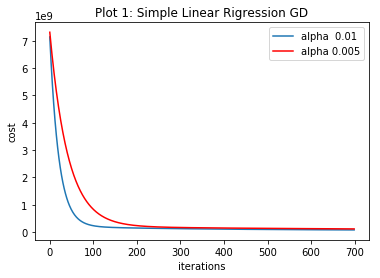

In [26]:
s =700
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 1: Simple Linear Rigression GD")
plt.plot(cost1[:s], label='alpha  0.01')
plt.plot(cost2[:s], 'r', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost1[-1])
print(cost2[-1])



173378134.48378074


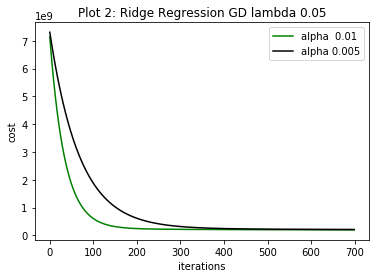

In [27]:
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 2: Ridge Regression GD lambda 0.05")
plt.plot(cost3[:s],'g', label='alpha  0.01')
plt.plot(cost4[:s], 'k', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost3[-1])

15379553605.7169


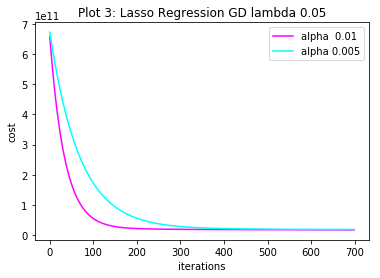

In [28]:
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title("Plot 3: Lasso Regression GD lambda 0.05")
plt.plot(cost5[:s], 'magenta',label='alpha  0.01')
plt.plot(cost6[:s], 'cyan', label='alpha 0.005')
plt.legend()
plt.plot()

print(cost5[-1])

In [12]:
h1 = np.matmul(x_test, theta1)
h2 = np.matmul(x_test, theta2)

h3 = np.matmul(x_test, theta3)
h4 = np.matmul(x_test, theta4)

h5 = np.matmul(x_test, theta5)
h6 = np.matmul(x_test, theta6)

# data.insert(5,'GD 0.01',h1)
# data.insert(5,'GD 0.005',h2)

# data.insert(5,'RGD0.01',h3)
# data.insert(6,'RGD0.005',h4)

# data.insert(5,'LGD 0.01',h5)
# data.insert(6,'LGD 0.005',h6)
# data.head()


# Simple GD

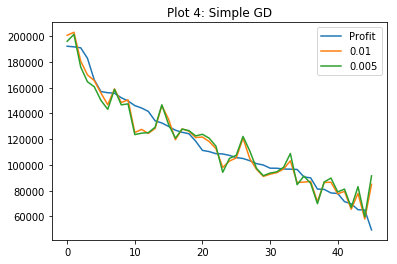

In [29]:
plt.title("Plot 4: Simple GD")
plt.plot(y_test,label='Profit')
plt.plot(h1 ,label='0.01')
plt.plot(h2,label='0.005')
plt.legend()

# Ridge GD

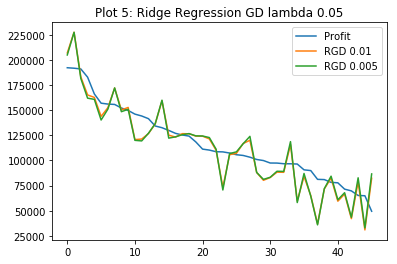

In [30]:
plt.title("Plot 5: Ridge Regression GD lambda 0.05")
plt.plot(y_test,label='Profit')
plt.plot(h3,label='RGD 0.01')
plt.plot(h4,label='RGD 0.005')
plt.legend()

# Lasso GD

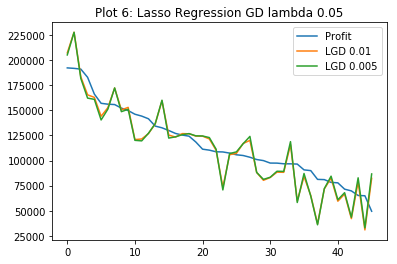

In [31]:
plt.title("Plot 6: Lasso Regression GD lambda 0.05")

plt.plot(y_test,label='Profit')
plt.plot(h5,label='LGD 0.01')
plt.plot(h6,label='LGD 0.005')
plt.legend()

# Comparison

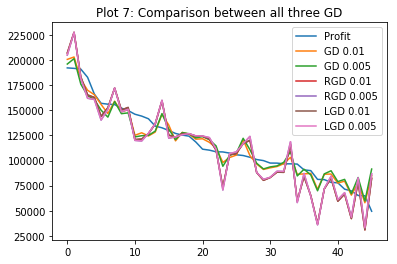

In [32]:
plt.title("Plot 7: Comparison between all three GD")
# plt.plot(data['Profit'],label='Profit')
# plt.plot(data['GD 0.01'],label='0.01')
# plt.plot(data['GD 0.005'],label='0.005')

# plt.plot(data['RGD0.01'],label='RGD 0.01')
# plt.plot(data['RGD0.005'],label='RGD 0.005')

# plt.plot(data['LGD 0.01'],label='LGD 0.01')
# plt.plot(data['LGD 0.005'],label='LGD 0.005')


plt.plot(y_test,label='Profit')
plt.plot(h1,label='GD 0.01')
plt.plot(h2,label='GD 0.005')

plt.plot(h3,label='RGD 0.01')
plt.plot(h4,label='RGD 0.005')

plt.plot(h5,label='LGD 0.01')
plt.plot(h6,label='LGD 0.005')
plt.legend()

In [17]:
data.head(15)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [18]:
data.head()
theta = pd.DataFrame(theta1)

In [19]:
theta = pd.DataFrame(np.concatenate((theta1, theta2, theta3,theta4, theta5,theta6),axis=1))
theta

,0,1,2,3,4,5
0,49069.513327,46253.592332,42.128290,20.388157,41.338053,19.983019
1,52882.685246,44958.490268,63401.158468,55745.594031,63619.724453,55840.598060
2,41216.655579,35750.840056,33907.916712,34598.334086,33936.292967,34640.526388
3,11931.226261,16377.976598,39769.175382,39822.682347,39786.393389,39838.645771
4,5451.816143,10405.238261,21226.740123,26089.555921,21132.454884,26073.195348
5,28076.676920,30718.566143,51307.412945,48461.411181,51413.764795,48521.958983
6,18857.781929,22284.622143,21314.664964,26501.732603,21236.877336,26510.470859
7,6414.740037,8474.548766,20952.880846,22628.019360,20929.189611,22630.219627
8,2844.121247,5347.847343,14516.712660,16826.075758,14453.990051,16798.274677
